In [ ]:
! gdown 1I8j_kfwk987-Rnhu05geMYXBtQPw1Uob


Downloading...
From: https://drive.google.com/uc?id=1I8j_kfwk987-Rnhu05geMYXBtQPw1Uob
To: /content/Kaggle digits train.csv
100% 76.8M/76.8M [00:00<00:00, 215MB/s]


In [ ]:
! gdown 1-hoSUApfWdS3R-iA2e2T1OdRfSvnSLjR

Downloading...
From: https://drive.google.com/uc?id=1-hoSUApfWdS3R-iA2e2T1OdRfSvnSLjR
To: /content/Kaggle digits test.csv
100% 51.1M/51.1M [00:00<00:00, 234MB/s]


In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, MaxPooling2D,AveragePooling2D ,Flatten

In [ ]:
train=pd.read_csv('/content/Kaggle digits train.csv')
test=pd.read_csv('/content/Kaggle digits test.csv')
train.shape

(42000, 785)

In [ ]:

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
label=train['label']
label = label.to_numpy()

train=train.drop('label',axis=1)
print(train.head())
train=train.to_numpy()


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train,label,random_state=42,stratify=label)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train=min_max.fit_transform(X_train)
X_test=min_max.transform(X_test)

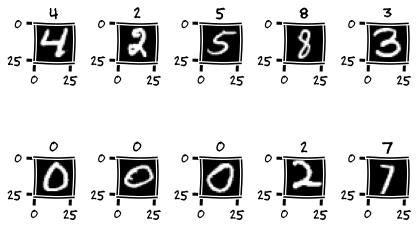

In [ ]:
# plt.imshow(X_train[0].reshape(28,28), cmap='gray')
X_train = np.array([X_train[i].reshape(28,28) for i in range(len(X_train))])
X_test = np.array([X_test[i].reshape(28,28) for i in range(len(X_test))])
X_train=X_train/255.0

X_test=X_test/255.0

plt.xkcd()


for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i].reshape((28,28)), cmap='gray')
  plt.title(y_train[i])
plt.tight_layout()
plt.show()


In [ ]:
n_features =X_train.shape[1]
n_classes=len(set(y_train))

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, activations

from tensorflow.keras.models import Model

inpx = Input(shape=(n_features,n_features,1,))
network_1 = Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same')(inpx)
network_2 = layers.AveragePooling2D()(network_1)
network_3 = layers.BatchNormalization()(network_2)

network_4 = Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same')(network_3)
network_5 = layers.AveragePooling2D()(network_4)
network_6 = layers.BatchNormalization()(network_5)

network_7 = Dropout(0.35)(network_6)


network_8 = Conv2D(128, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same')(network_7)
network_9 = layers.AveragePooling2D()(network_8)

network_10 = layers.BatchNormalization()(network_9)

network_11= Dropout(0.35)(network_10)


network_8 = Conv2D(128, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same')(network_7)
network_9 = layers.AveragePooling2D()(network_8)

network_10 = layers.BatchNormalization()(network_9)

network_11= Dropout(0.35)(network_10)


network_12 = Flatten()(network_11)

network_13 = Dense(256, activation='relu')(network_12)


network_14 = Dense(128, activation='relu')(network_13)

network_15 = Dense(64, activation='relu')(network_14)

network_16= Dense(10, activation='softmax')(network_15)

model = Model(inpx, network_16)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['sparse_categorical_accuracy'])
history=model.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs=50, batch_size=128)

Epoch 1/50
247/247 [==============================] - 3s 9ms/step - loss: 0.2877 - sparse_categorical_accuracy: 0.9082 - val_loss: 2.5132 - val_sparse_categorical_accuracy: 0.0968
Epoch 2/50
247/247 [==============================] - 2s 7ms/step - loss: 0.0925 - sparse_categorical_accuracy: 0.9705 - val_loss: 5.5037 - val_sparse_categorical_accuracy: 0.0968
Epoch 3/50
247/247 [==============================] - 2s 8ms/step - loss: 0.0672 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.1359 - val_sparse_categorical_accuracy: 0.9561
Epoch 4/50
247/247 [==============================] - 2s 9ms/step - loss: 0.0625 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.0704 - val_sparse_categorical_accuracy: 0.9783
Epoch 5/50
247/247 [==============================] - 2s 8ms/step - loss: 0.0495 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0536 - val_sparse_categorical_accuracy: 0.9818
Epoch 6/50
247/247 [==============================] - 2s 8ms/step - loss: 0.0454 - sparse_categorica

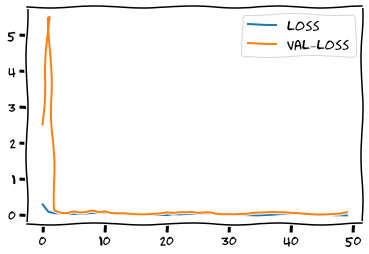

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss']);

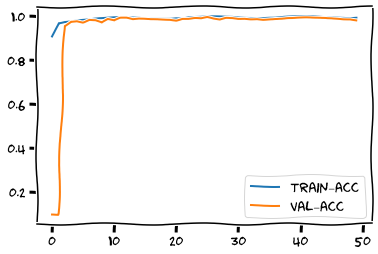

In [ ]:

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.legend(['train_acc', 'val_acc']);

In [ ]:
y_pred  = model.predict(X_test)
predicted_categories = np.argmax(y_pred, axis = 1)

In [ ]:

predictions = pd.Series(predicted_categories, name='Label')
image_id = pd.Series(range(1,10501), name = 'ImageId')
predictions = pd.concat([image_id, predictions], axis = 1)
predictions.to_csv('submission.csv', index=False)

329/329 [==============================] - 1s 2ms/step
